<a href="https://colab.research.google.com/github/Mbigdeli2003/Fault_detection_training/blob/main/Fault_Detection_TA_Session1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#Importing TEP

In [3]:
##Train
Fault_Free_Train = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Fault/TEP Data/Normal 00 train (480x52).xlsx") #replace address from drive
Faulty_Train = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Fault/TEP Data/Fault 1-20  train (20x480x52).xlsx") #replace address from drive

##Test

Fault_Free_Test = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Fault/TEP Data/Normal 00 test (960x52).xlsx") #replace address from drive
Faulty_Test = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Fault/TEP Data/Fault 1-20  test  (20x960x52).xlsx") #replace address from drive

## Sorting Data
Names = ['Unnamed: 0', 'faultNumber', 'simulationRun', 'sample', 'xmeas_1',
       'xmeas_2', 'xmeas_3', 'xmeas_4', 'xmeas_5', 'xmeas_6', 'xmeas_7',
       'xmeas_8', 'xmeas_9', 'xmeas_10', 'xmeas_11', 'xmeas_12', 'xmeas_13',
       'xmeas_14', 'xmeas_15', 'xmeas_16', 'xmeas_17', 'xmeas_18', 'xmeas_19',
       'xmeas_20', 'xmeas_21', 'xmeas_22', 'xmeas_23', 'xmeas_24', 'xmeas_25',
       'xmeas_26', 'xmeas_27', 'xmeas_28', 'xmeas_29', 'xmeas_30', 'xmeas_31',
       'xmeas_32', 'xmeas_33', 'xmeas_34', 'xmeas_35', 'xmeas_36', 'xmeas_37',
       'xmeas_38', 'xmeas_39', 'xmeas_40', 'xmeas_41', 'xmv_1', 'xmv_2',
       'xmv_3', 'xmv_4', 'xmv_5', 'xmv_6', 'xmv_7', 'xmv_8', 'xmv_9', 'xmv_10',
       'xmv_11']
Faulty_Train = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Fault/TEP Data/Fault 1-20  train (20x480x52).xlsx", header=None, names=Names)

### Head

In [6]:
Faulty_Train.head(10)

,Unnamed: 0,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0,1,1,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,1,1,1,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,2,1,1,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,3,1,1,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,4,1,1,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461
5,5,1,1,6,0.29303,3691.7,4502.2,9.3780,27.111,41.999,...,53.595,28.898,59.107,22.291,38.673,39.890,47.571,47.430,41.308,19.134
6,6,1,1,7,0.24301,3658.8,4541.6,9.3374,26.623,42.448,...,53.548,23.558,62.125,22.244,40.429,35.816,45.514,47.508,41.338,17.625
7,7,1,1,8,0.24090,3653.3,4500.0,9.3495,27.075,42.412,...,54.045,23.765,62.006,22.702,40.300,39.807,43.364,47.344,40.899,18.156
8,8,1,1,9,0.29416,3654.3,4454.7,9.3213,27.363,42.238,...,54.083,28.697,61.623,22.064,38.976,38.066,45.381,47.483,40.876,18.146
9,9,1,1,10,0.29372,3675.9,4487.4,9.4107,26.809,42.144,...,53.692,28.741,61.490,22.409,39.615,38.309,47.296,47.513,42.355,18.957


### Describe

In [7]:
Fault_Free_Train.describe()

,Unnamed: 0,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
count,480.000000,480.0,480.0,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,...,480.00000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,239.500000,0.0,1.0,240.500000,0.250044,3663.155208,4510.101042,9.343678,26.908212,42.338790,...,53.95809,24.602394,61.248090,22.158935,40.068554,38.270946,46.617733,49.004890,41.098098,18.094081
std,138.708327,0.0,0.0,138.708327,0.027852,32.860430,38.606628,0.078507,0.216247,0.219964,...,0.44220,2.729410,1.245008,0.398833,1.398502,3.069306,2.403235,2.115134,0.557734,1.421391
min,0.000000,0.0,1.0,1.000000,0.163350,3564.600000,4400.500000,9.126600,26.201000,41.796000,...,52.75300,16.246000,57.813000,21.141000,35.224000,28.979000,39.204000,45.188000,39.538000,14.073000
25%,119.750000,0.0,1.0,120.750000,0.231980,3643.550000,4484.675000,9.286950,26.762500,42.185750,...,53.67700,22.859750,60.343000,21.889750,39.275000,36.273250,44.957500,47.506500,40.751750,17.099250
50%,239.500000,0.0,1.0,240.500000,0.249640,3662.000000,4506.800000,9.343650,26.907500,42.332000,...,53.96250,24.527500,61.320500,22.141000,40.059000,38.131500,46.623000,48.338500,41.102500,18.063500
75%,359.250000,0.0,1.0,360.250000,0.267905,3682.700000,4536.750000,9.398825,27.058500,42.473000,...,54.24200,26.341250,62.104000,22.436000,40.833250,40.641000,48.366250,50.273750,41.471250,19.037500
max,479.000000,0.0,1.0,480.000000,0.336420,3775.000000,4613.400000,9.575700,27.501000,43.040000,...,55.10600,32.841000,65.091000,23.351000,44.616000,46.489000,53.490000,54.864000,42.927000,22.150000


In [8]:
# choosing some rows and comlumns
N_Faulty_Test = Faulty_Test.iloc[1:100,1:10]
N_Faulty_Test

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6
1,1,1,2,0.25234,3642.2,4568.7,9.4145,26.999,42.586
2,1,1,3,0.24840,3643.1,4507.5,9.2901,26.927,42.278
3,1,1,4,0.25153,3628.3,4519.3,9.3347,26.999,42.330
4,1,1,5,0.21763,3655.8,4571.0,9.3087,26.901,42.402
5,1,1,6,0.21926,3646.8,4478.2,9.4460,26.879,42.059
...,...,...,...,...,...,...,...,...,...
95,1,1,96,0.26248,3675.9,4557.2,9.4925,26.828,42.469
96,1,1,97,0.27845,3645.3,4571.5,9.4907,26.999,42.487
97,1,1,98,0.28079,3682.6,4583.2,9.5333,27.125,42.408
98,1,1,99,0.23067,3681.4,4485.1,9.5962,26.828,42.296


from matplotlib import pyplot as plt
N_Faulty_Test['sample'].plot(kind='hist', bins=20, title='sample')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
N_Faulty_Test['xmeas_1'].plot(kind='hist', bins=20, title='xmeas_1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
N_Faulty_Test['xmeas_2'].plot(kind='hist', bins=20, title='xmeas_2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
N_Faulty_Test['xmeas_3'].plot(kind='hist', bins=20, title='xmeas_3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
N_Faulty_Test.plot(kind='scatter', x='sample', y='xmeas_1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
N_Faulty_Test.plot(kind='scatter', x='xmeas_1', y='xmeas_2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
N_Faulty_Test.plot(kind='scatter', x='xmeas_2', y='xmeas_3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
N_Faulty_Test.plot(kind='scatter', x='xmeas_3', y='xmeas_4', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['faultNumber']
  ys = series['xmeas_1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = N_Faulty_Test.sort_values('faultNumber', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('faultNumber')
_ = plt.ylabel('xmeas_1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['faultNumber']
  ys = series['xmeas_2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = N_Faulty_Test.sort_values('faultNumber', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('faultNumber')
_ = plt.ylabel('xmeas_2')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['faultNumber']
  ys = series['xmeas_3']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = N_Faulty_Test.sort_values('faultNumber', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('faultNumber')
_ = plt.ylabel('xmeas_3')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['faultNumber']
  ys = series['xmeas_4']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = N_Faulty_Test.sort_values('faultNumber', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('faultNumber')
_ = plt.ylabel('xmeas_4')

from matplotlib import pyplot as plt
N_Faulty_Test['sample'].plot(kind='line', figsize=(8, 4), title='sample')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
N_Faulty_Test['xmeas_1'].plot(kind='line', figsize=(8, 4), title='xmeas_1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
N_Faulty_Test['xmeas_2'].plot(kind='line', figsize=(8, 4), title='xmeas_2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
N_Faulty_Test['xmeas_3'].plot(kind='line', figsize=(8, 4), title='xmeas_3')
plt.gca().spines[['top', 'right']].set_visible(False)

##Calcualting Basic Varibles of the TEP

In [9]:
# Mean and STD Calculation from Numpy
a= Faulty_Test['xmeas_1'].values

mean = np.mean(a)
std = np.std(a)

print(mean)
print(std)

0.25748995164505206
0.14282464670394282


### Choosing 10 classes of faulty data and assigning to new varibales

In [10]:
##Ten Clasess
our_faulty_classes= Faulty_Train[(Faulty_Train.faultNumber==1)|
                                 (Faulty_Train.faultNumber==3 )|
                                 (Faulty_Train.faultNumber==5 )|
                                 (Faulty_Train.faultNumber==7 )|
                                 (Faulty_Train.faultNumber==9 )|
                                 (Faulty_Train.faultNumber==11 )|
                                 (Faulty_Train.faultNumber==13)|
                                 (Faulty_Train.faultNumber==15 )|
                                 (Faulty_Train.faultNumber==17)|
                                 (Faulty_Train.faultNumber==19)].iloc[:,4:]
our_faulty_classes

,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,xmeas_8,xmeas_9,xmeas_10,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,74.863,120.41,0.33818,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,75.000,120.41,0.33620,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,74.771,120.42,0.33563,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,75.224,120.39,0.33553,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,75.388,120.39,0.32632,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9495,0.24324,3652.3,4506.2,9.4768,26.226,42.499,2706.4,74.618,120.40,0.32378,...,54.153,23.389,59.631,22.730,38.923,33.415,45.024,49.573,40.961,16.629
9496,0.23186,3662.8,4531.6,9.3482,27.157,42.658,2702.9,75.119,120.39,0.35357,...,54.053,22.509,60.607,23.352,42.844,38.048,42.477,49.837,41.066,18.263
9497,0.22797,3656.2,4495.1,9.3052,26.952,42.666,2699.3,74.926,120.38,0.35769,...,54.490,22.892,62.153,23.188,42.340,41.090,46.915,49.921,40.912,19.202
9498,0.23986,3633.9,4523.8,9.3939,26.918,42.252,2703.8,74.915,120.38,0.34061,...,54.560,23.114,63.179,21.696,39.530,37.839,47.486,50.185,40.910,19.354


## Concatinating

In [11]:
X1=Faulty_Train[(Faulty_Train.faultNumber==1)].iloc[0:480,:]
X3=Faulty_Train[(Faulty_Train.faultNumber==3)].iloc[0:480,:]

X5=Faulty_Train[(Faulty_Train.faultNumber==5)].iloc[0:480,:]

X7=Faulty_Train[(Faulty_Train.faultNumber==7)].iloc[0:480,:]

X9=Faulty_Train[(Faulty_Train.faultNumber==9)].iloc[0:480,:]

X11=Faulty_Train[(Faulty_Train.faultNumber==11)].iloc[0:480,:]

X13=Faulty_Train[(Faulty_Train.faultNumber==13)].iloc[0:480,:]

X15=Faulty_Train[(Faulty_Train.faultNumber==15)].iloc[0:480,:]
X17=Faulty_Train[(Faulty_Train.faultNumber==17)].iloc[0:480,:]
Faulty_Train_T=pd.concat([X1,X3,X5,X7,X9,X11,X13,X15,X17])
type(Faulty_Train_T)
type(Fault_Free_Train)

pandas.core.frame.DataFrame

##Plotting

<ipython-input-12-66fe98147251>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


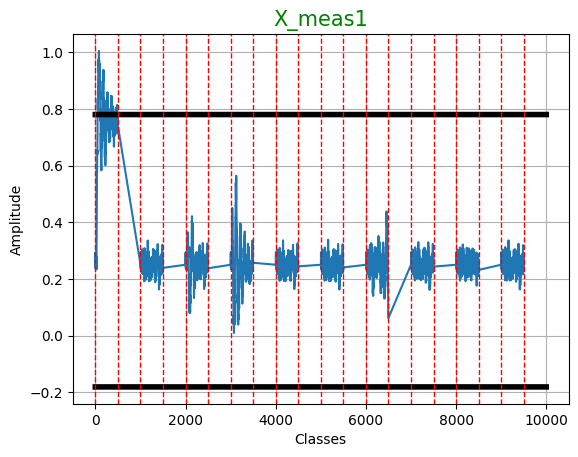

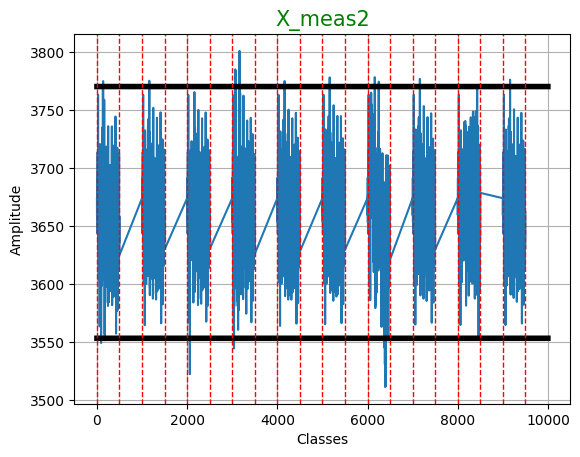

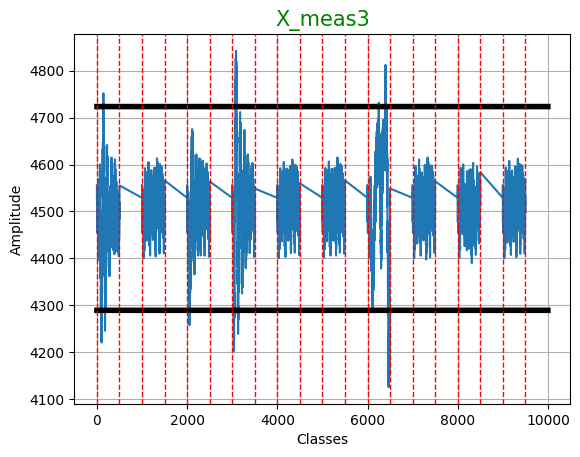

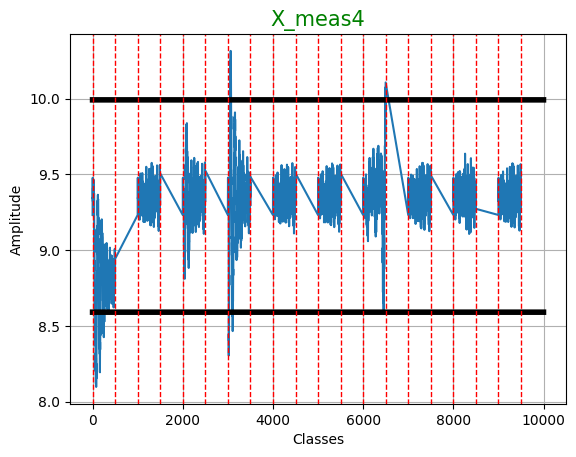

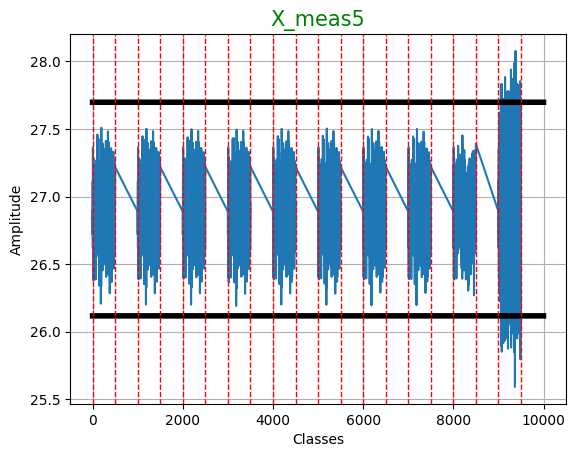

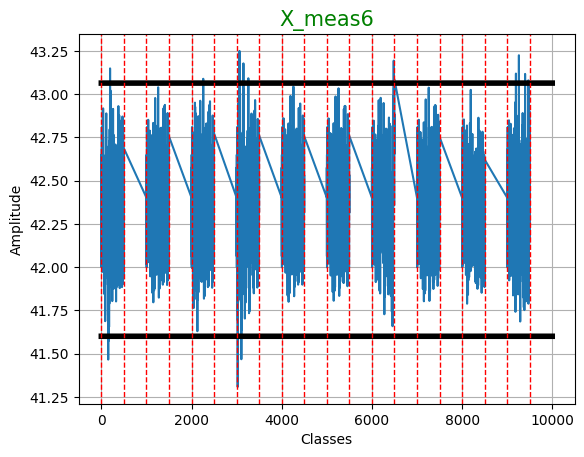

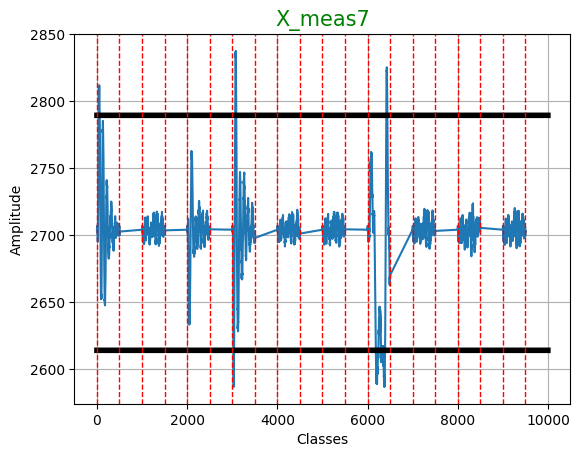

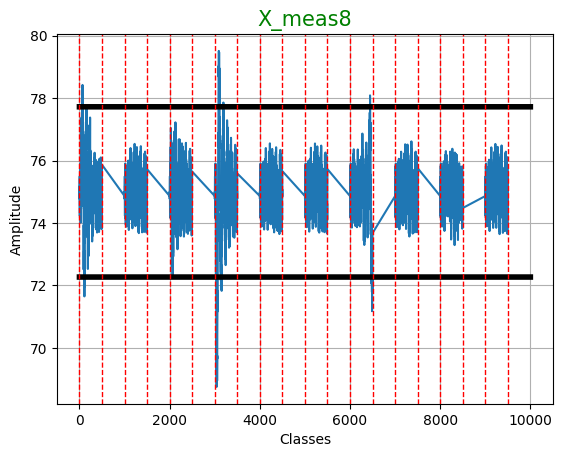

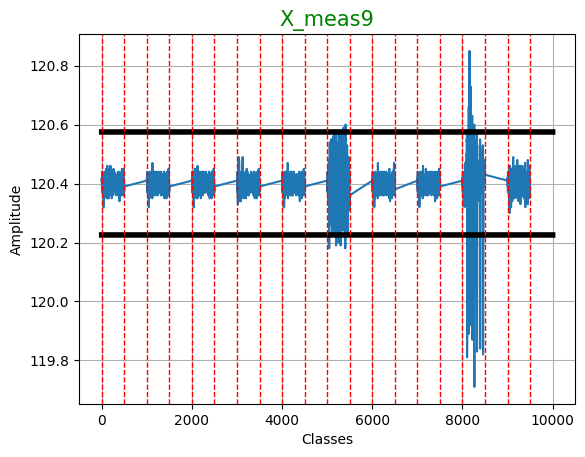

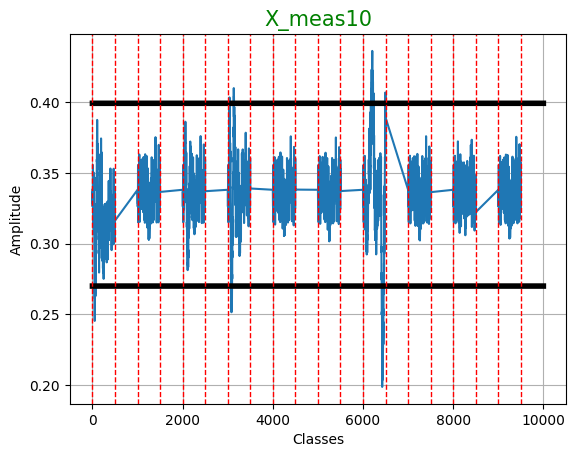

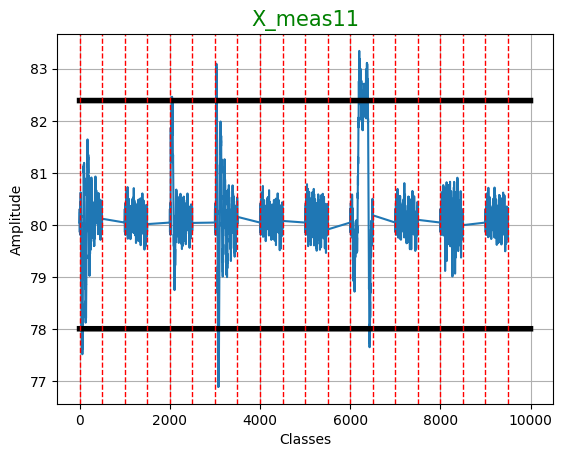

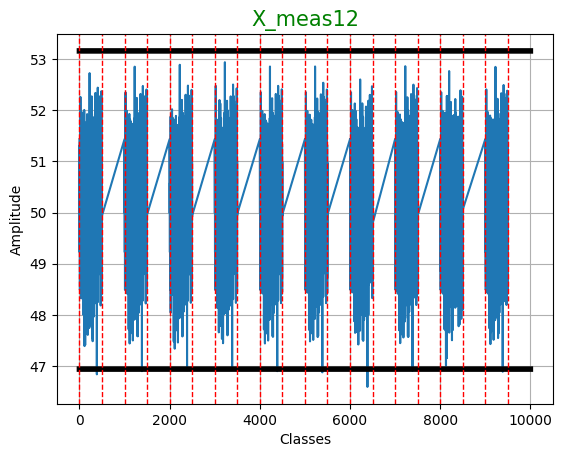

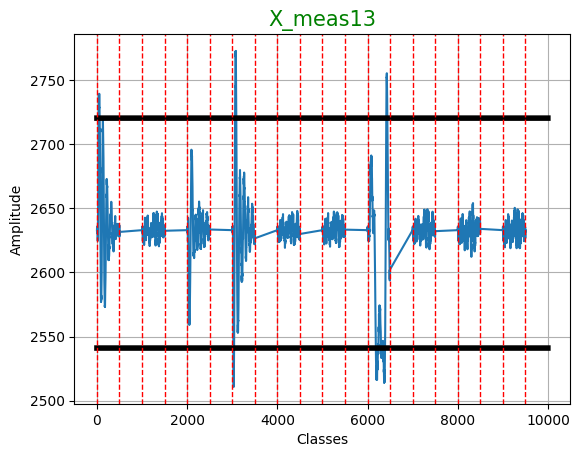

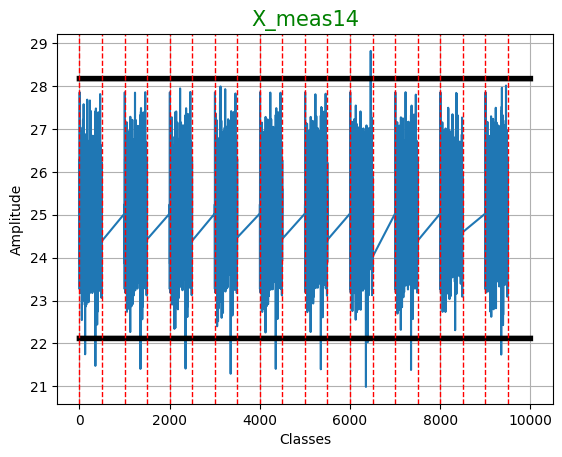

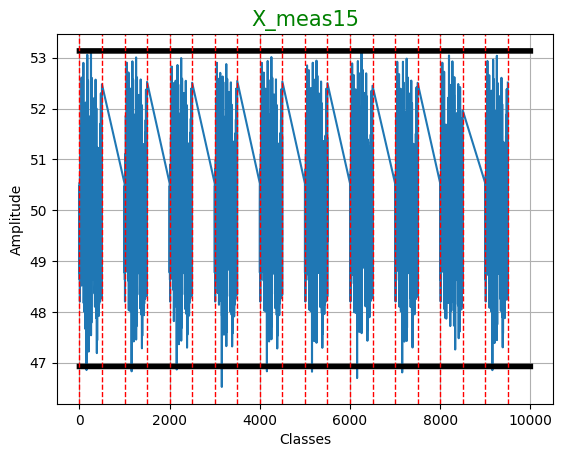

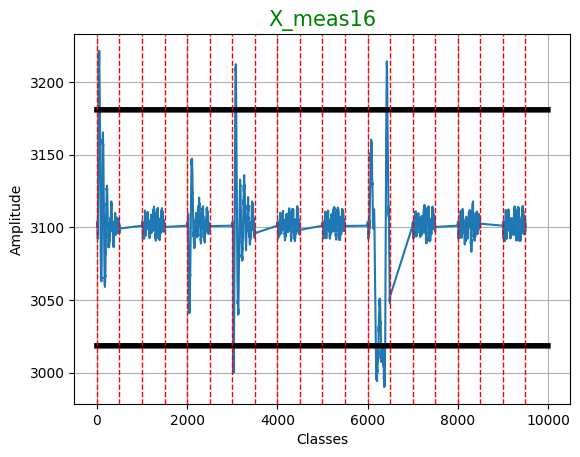

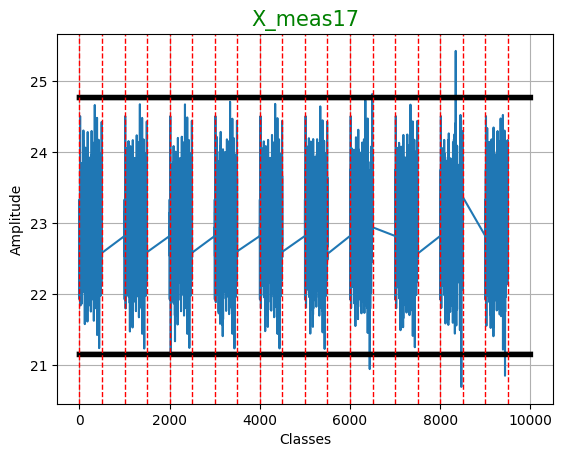

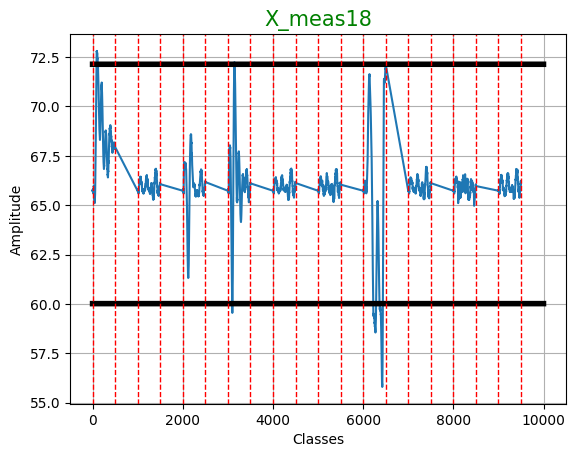

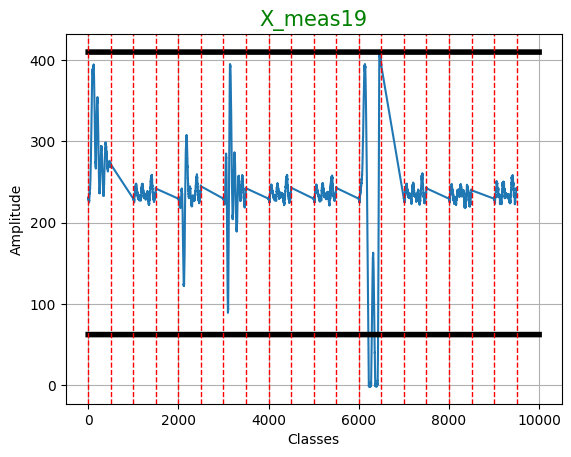

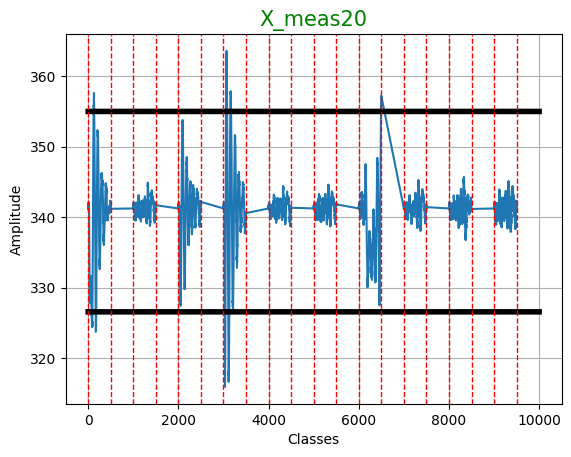

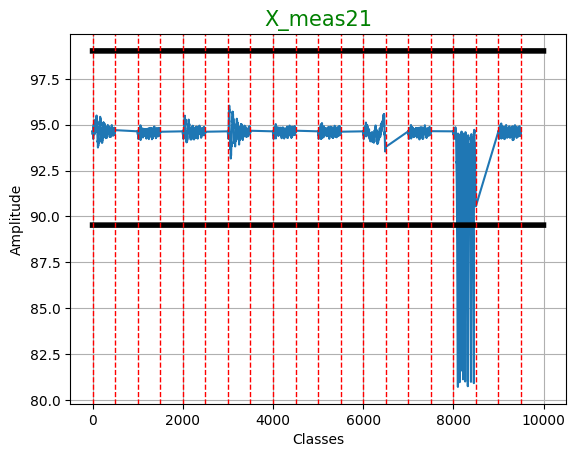

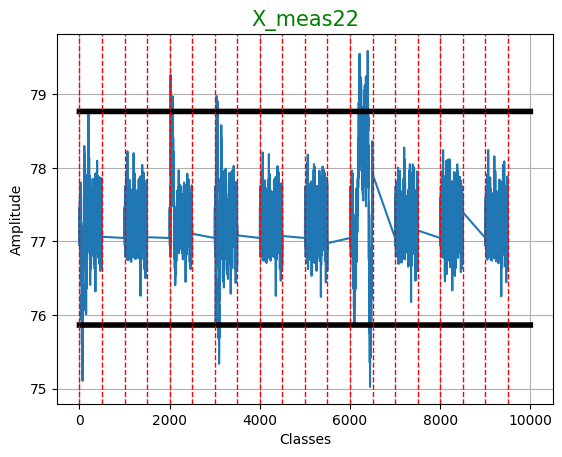

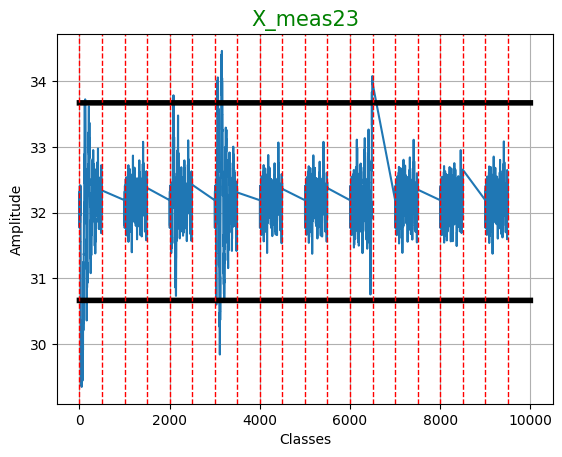

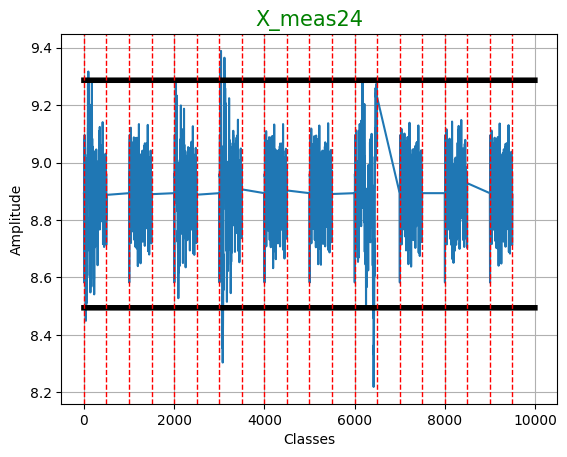

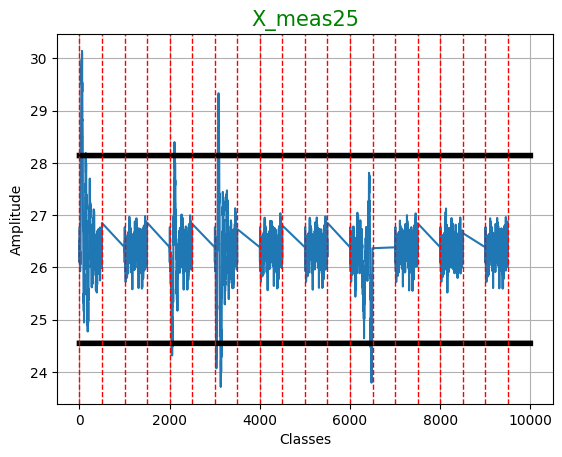

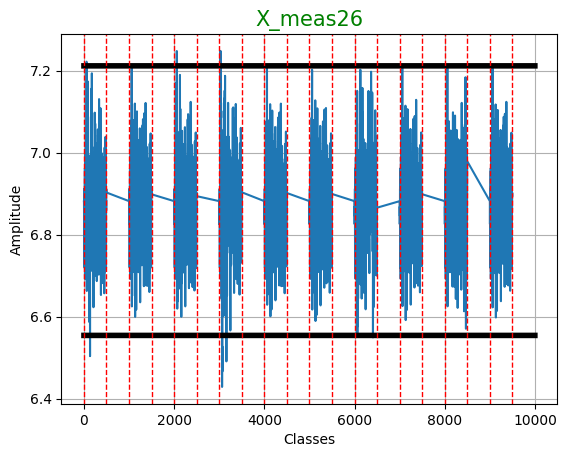

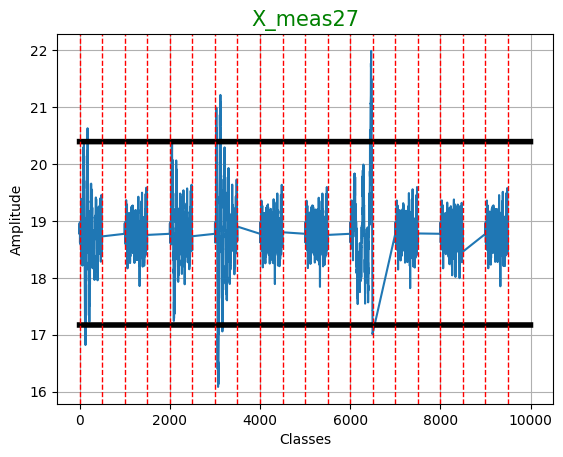

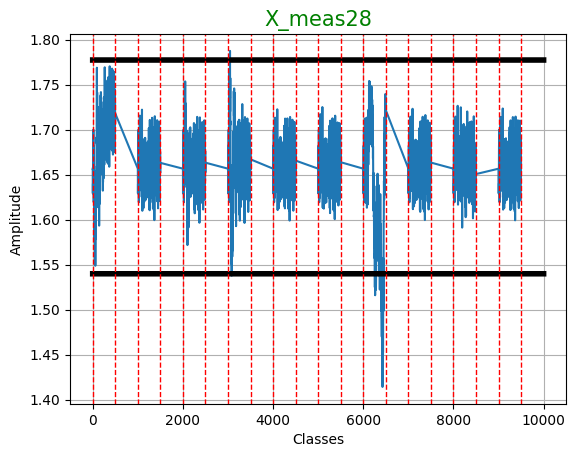

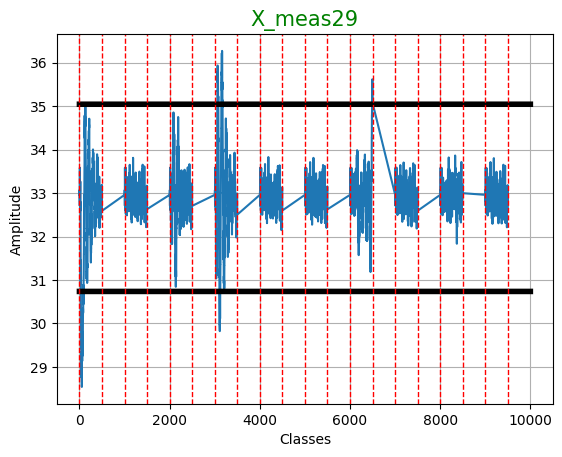

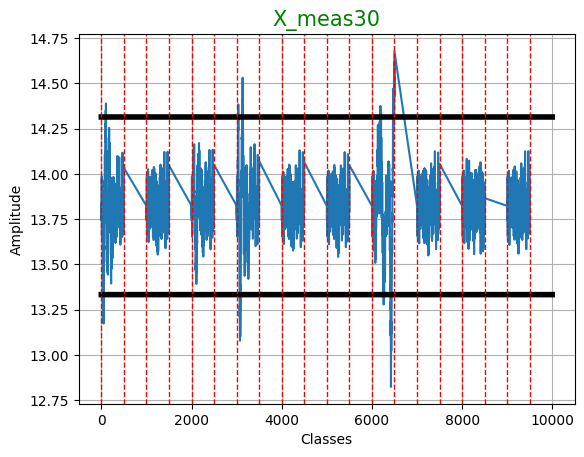

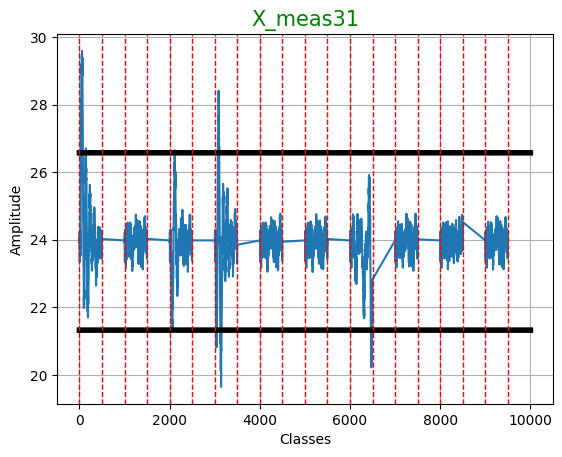

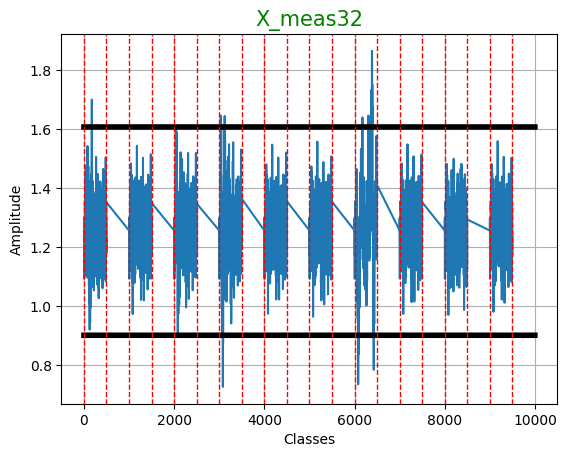

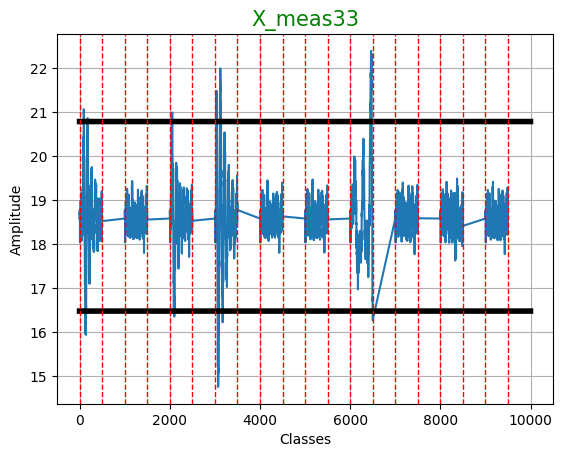

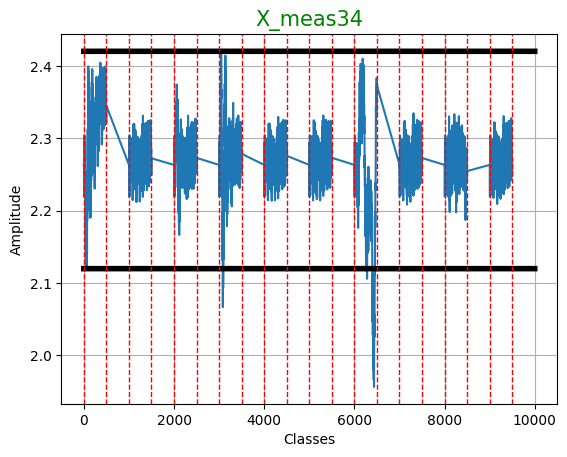

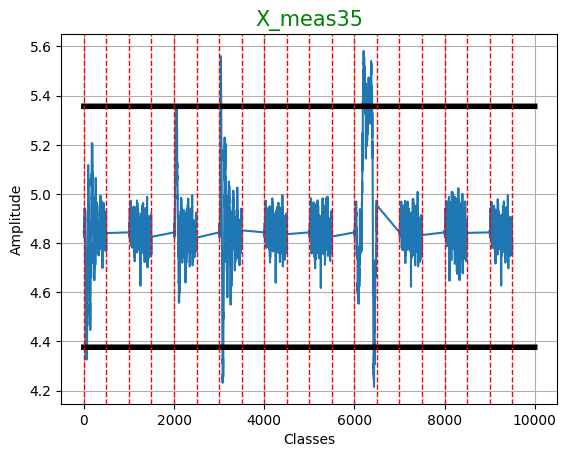

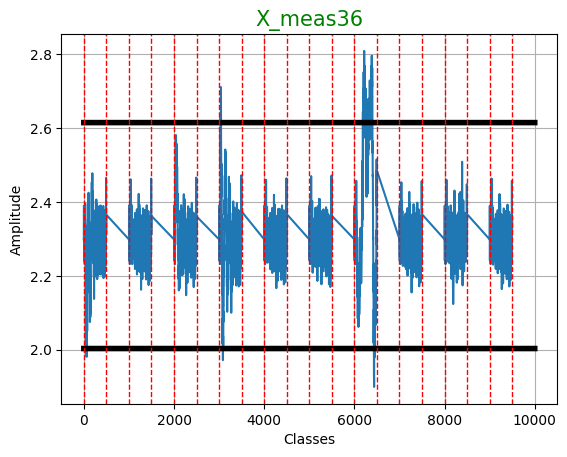

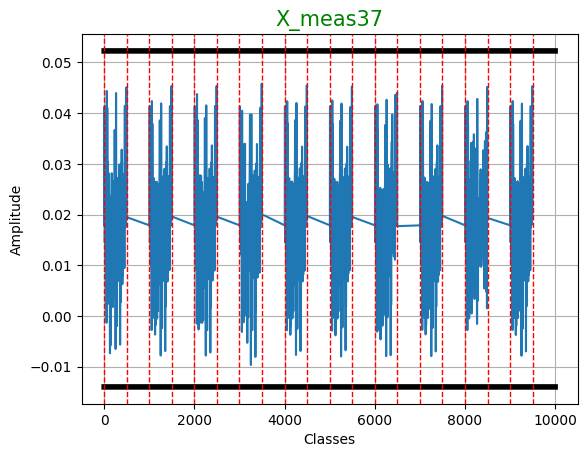

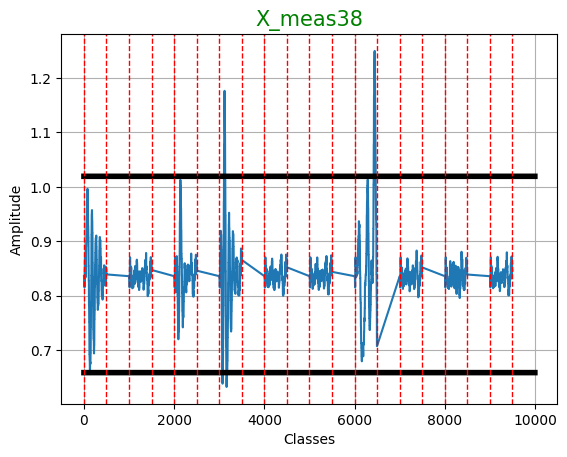

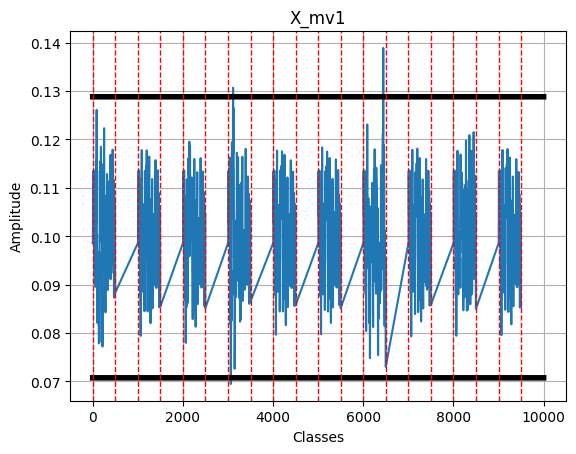

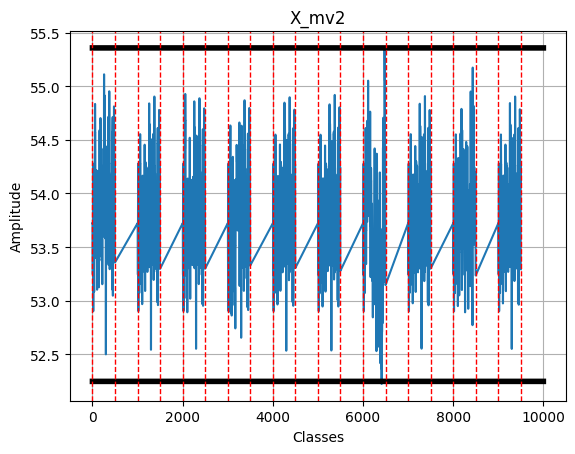

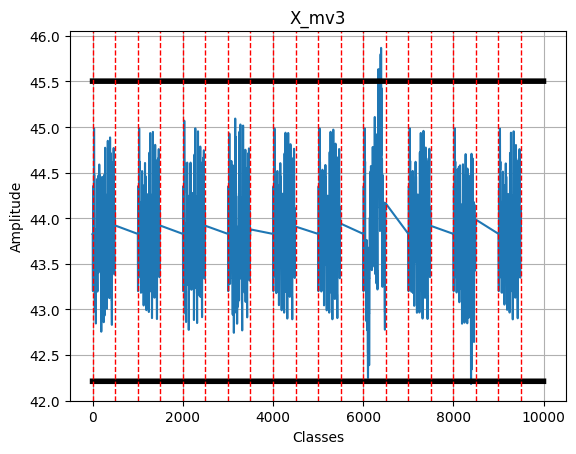

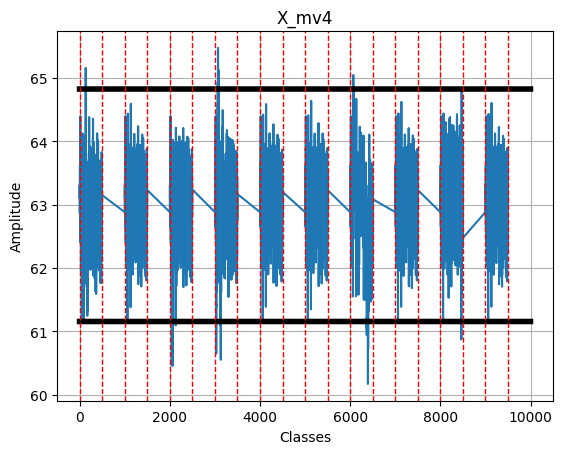

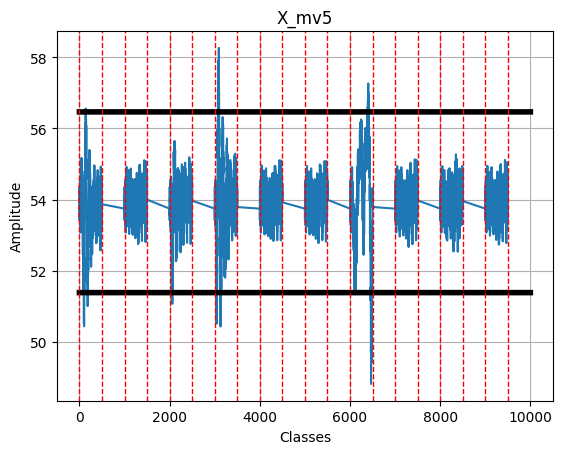

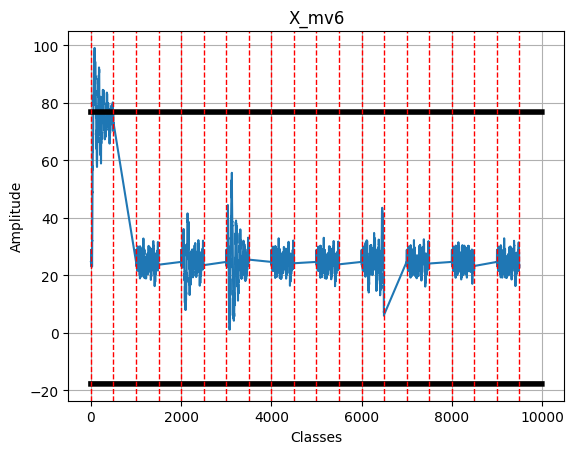

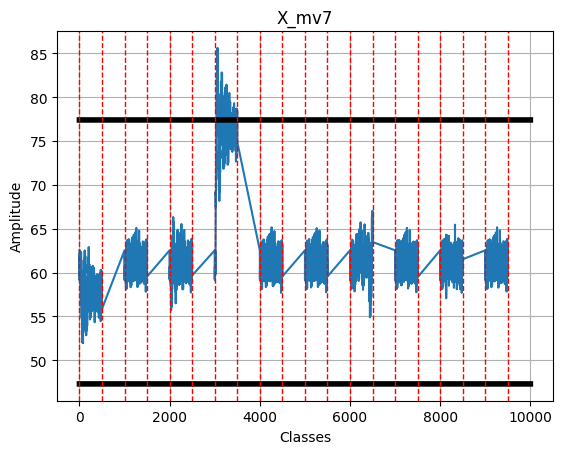

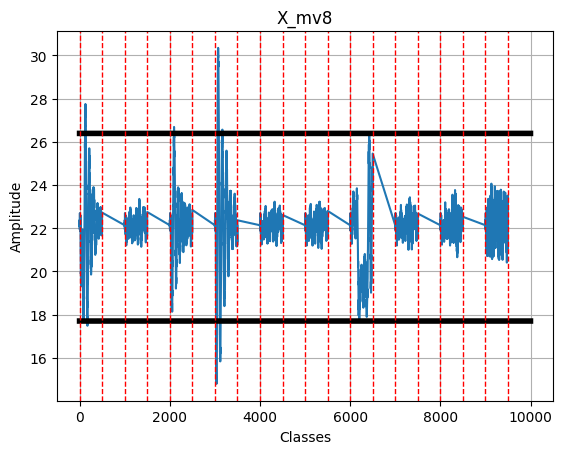

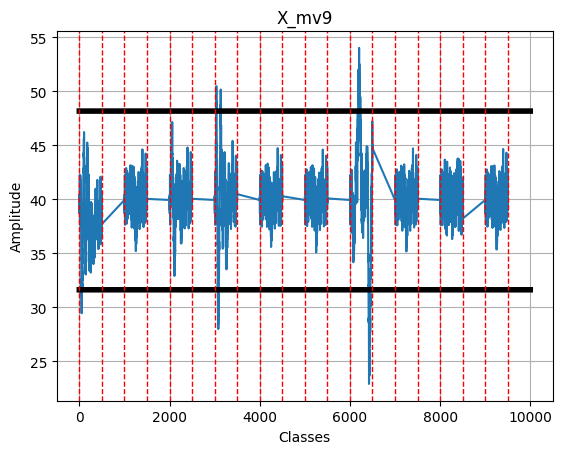

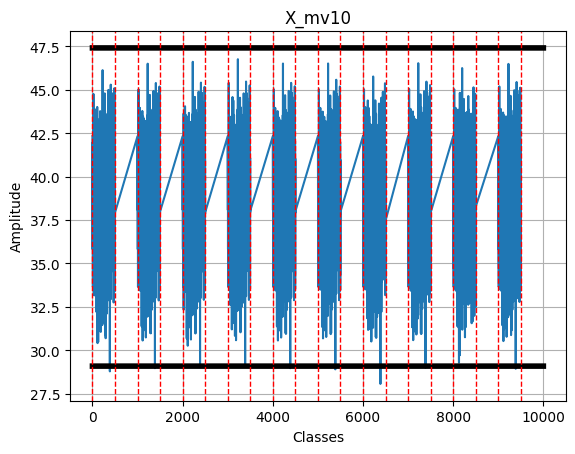

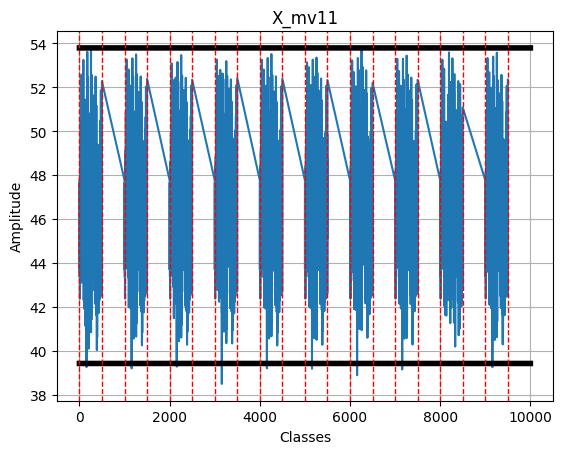

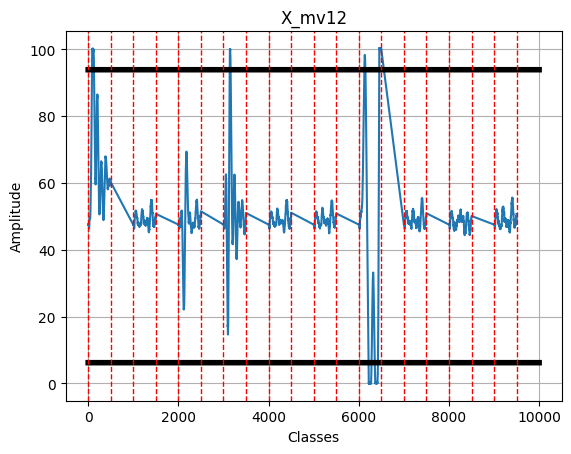

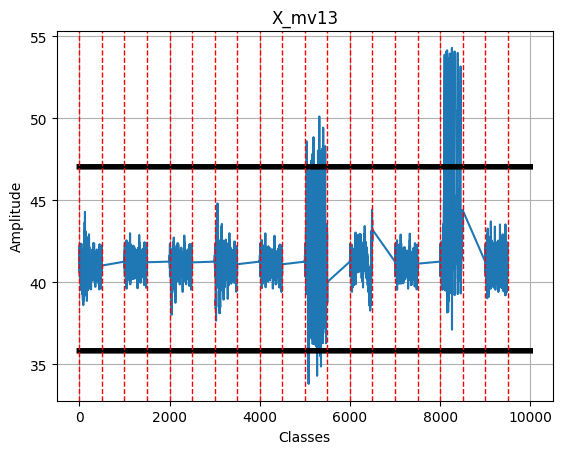

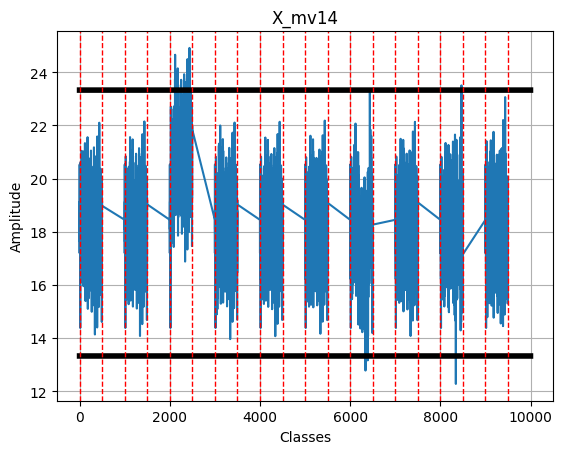

# Excer Qeustions guides

1. Z-Score Normalization (Standardization):
Z-Score standardization is used to scale data so that it has a mean of 0 and a standard deviation of

In [ ]:
from scipy import stats

# Assuming 'df' is the DataFrame containing your TEP data
# Apply Z-Score normalization to the entire DataFrame
z_scores = stats.zscore(df)


4. Min-Max Scaling:
Min-Max scaling brings all the values into the range [0, 1].

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max scaling to the DataFrame
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)


2. t-test:
The t-test can be used to compare the means of two groups (e.g., normal data vs fault data).

In [ ]:
from scipy.stats import ttest_ind

# Perform t-test between normal operation data and a fault condition
t_statistic, p_value = ttest_ind(df_normal['XMEAS_1'], df_fault1['XMEAS_1'])


3. ANOVA (One-way):
Use ANOVA to compare the means of more than two groups (e.g., normal vs multiple fault conditions).

In [ ]:
from scipy.stats import f_oneway

# Perform ANOVA across multiple groups (normal vs fault 1, fault 2, etc.)
f_statistic, p_value = f_oneway(df_normal['XMEAS_1'], df_fault1['XMEAS_1'], df_fault2['XMEAS_1'])

#K-means

K-Means یک الگوریتم خوشه‌بندی است که داده‌ها را به k گروه یا خوشه تقسیم می‌کند. هدف این الگوریتم، گروه‌بندی داده‌ها به طوری است که هر داده به نزدیک‌ترین مرکز خوشه (Centroid) اختصاص داده شود و خوشه‌ها به نحوی شکل بگیرند که داده‌های هر خوشه مشابه یکدیگر باشند.

مراحل الگوریتم K-Means:
انتخاب تعداد خوشه‌ها (k):

کاربر باید تعداد خوشه‌های مورد نظر (k) را مشخص کند. این پارامتر بسیار مهم است و تأثیر زیادی بر نتایج نهایی دارد.
مراکز اولیه خوشه‌ها (Centroids):

K مراکز اولیه (Centroids) به صورت تصادفی انتخاب می‌شوند. این مراکز می‌توانند نقاط داده‌های موجود یا مقادیر تصادفی باشند.
تخصیص داده‌ها به خوشه‌ها:

هر نقطه داده به مرکز خوشه‌ای که کمترین فاصله را دارد اختصاص داده می‌شود. معیار معمول برای فاصله، فاصله اقلیدسی است.
به‌روزرسانی مراکز خوشه‌ها:

پس از اختصاص داده‌ها به خوشه‌ها، مرکز هر خوشه با میانگین تمام نقاط داده‌ای که به آن خوشه اختصاص یافته‌اند، به‌روزرسانی می‌شود.
تکرار:

مراحل تخصیص داده‌ها به خوشه‌ها و به‌روزرسانی مراکز خوشه‌ها تکرار می‌شود تا زمانی که مراکز خوشه‌ها تغییر نکنند یا الگوریتم به یک همگرایی برسد.
معیار همگرایی:
الگوریتم زمانی متوقف می‌شود که هیچ تغییری در تخصیص داده‌ها به خوشه‌ها یا در مراکز خوشه‌ها ایجاد نشود، یعنی خوشه‌ها تثبیت شده‌اند.
فرمول فاصله اقلیدسی:
معمولاً از فاصله اقلیدسی برای اندازه‌گیری فاصله هر نقطه داده از مراکز خوشه استفاده می‌شود.

In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

# Assuming the TEP data is loaded as a Pandas DataFrame, for example:
# df_normal = pd.read_csv('TEP_normal_operation.csv')
# df_fault1 = pd.read_csv('TEP_fault1.csv')
# For this example, let's assume we concatenate multiple samples of normal and faulty data.

# Loading sample data for normal and faulty operation (replace with your actual TEP data)
# Let's say we have the normal operation and a few fault datasets
data = pd.concat([df_normal, df_fault1, df_fault2])  # Concatenate normal and fault data

# Preprocessing the data (e.g., normalizing or handling missing values if necessary)
# Here, we are assuming all columns are numerical features representing TEP sensor/actuator values

# Step 1: Flatten the dataset (if needed), typically TEP data is already 2D (samples x features)
# If using a 3D tensor, you would reshape it into 2D
# For example, if the data is in a 3D tensor [N, T, F], we could flatten it:
# data_reshaped = tep_tensor.reshape(N * T, F)

# Step 2: Apply K-Means clustering
# Specify the number of clusters (k). In TEP, we have 22 classes (1 normal + 21 faults), so we might use k=22
kmeans = KMeans(n_clusters=22, random_state=42)

# Fit the model to the data
kmeans.fit(data)

# Get the cluster labels
labels = kmeans.labels_

# Step 3: Analyze the results
# You can add the labels as a new column to the DataFrame for further analysis
data['Cluster'] = labels

# Print cluster centers and other K-Means results
print("Cluster Centers:\n", kmeans.cluster_centers_)
print("Inertia:", kmeans.inertia_)  # Sum of squared distances to closest cluster center
print("Number of iterations:", kmeans.n_iter_)
